# Unsupervised Learning | Clustering (DBSCAN)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

==========

## DBSCAN Clustering | Intuition (Moon)

Scikit-Learn Clustering Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Visualizing DBSCAN Clustering: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### Importing Data

In [2]:
moons = pd.read_csv('moons.csv')
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


### Exploring Data

<Axes: xlabel='X1', ylabel='X2'>

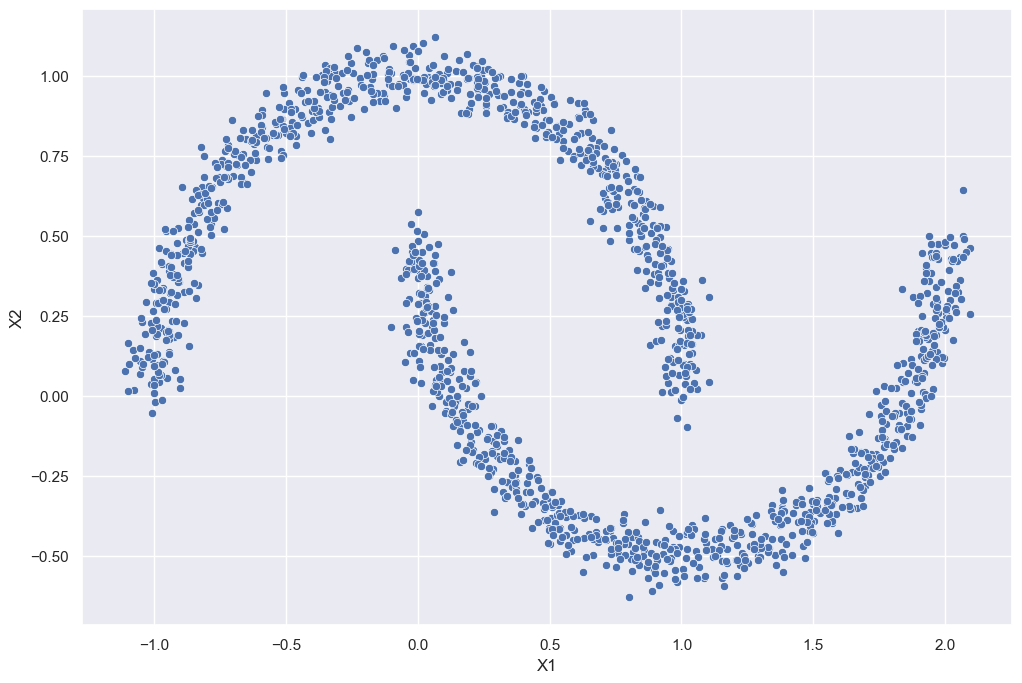

In [3]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='X1',y='X2',data=moons)

### DBSCAN vs. K-Means

##### K-Means Clustering

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

In [5]:
# K-Means Clustering
labels = model.fit_predict(moons)
labels

C:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 0, 1, 0])

<Axes: xlabel='X1', ylabel='X2'>

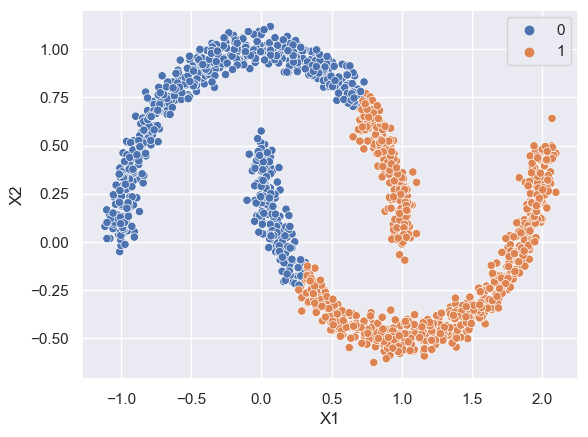

In [6]:
# Plotting K-Means Clusters
sns.scatterplot(data=moons,x='X1',y='X2',hue=labels)

##### DBSCAN Clustering

In [7]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.2) #3la hsb hagm el epsilon bygebli el no. bta3 el clusters

In [8]:
# DBSCAN Clustering
labels = model.fit_predict(moons)
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<Axes: xlabel='X1', ylabel='X2'>

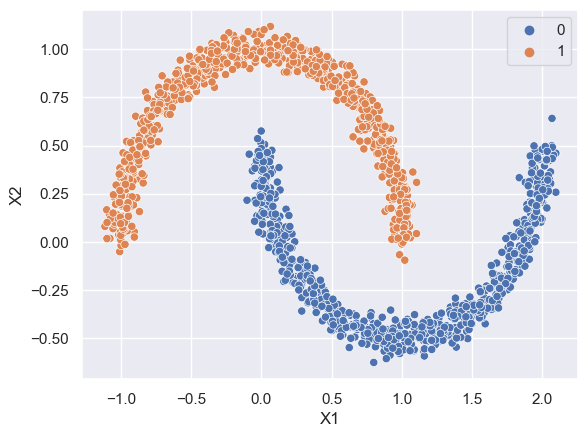

In [9]:
# Plotting DBSCAN Clusters
sns.scatterplot(data=moons,x='X1',y='X2',hue=labels)

==========

## DBSCAN Clustering | Full Case-study (Wholesale Customers)

Dataset: https://archive.ics.uci.edu/ml/datasets/wholesale+customers

### Importing & Inspecting Data

In [10]:
whole = pd.read_csv('wholesale-customers-data.csv')

In [11]:
whole.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### Exploring Data

<Axes: xlabel='Milk', ylabel='Grocery'>

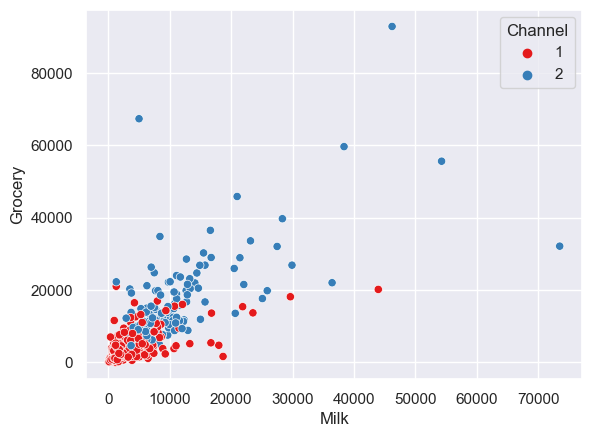

In [13]:
# Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column
sns.scatterplot(data=whole,x='Milk',y='Grocery',hue='Channel', palette='Set1')

<Axes: xlabel='Milk', ylabel='Count'>

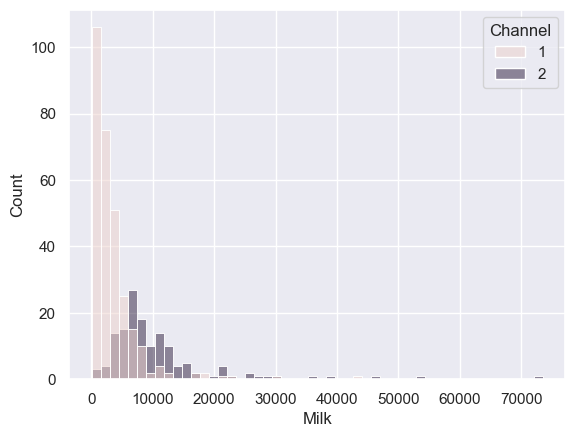

In [14]:
# Use seaborn to create a histogram of MILK spending, colored by Channel.
sns.histplot(whole,x='Milk',hue='Channel')

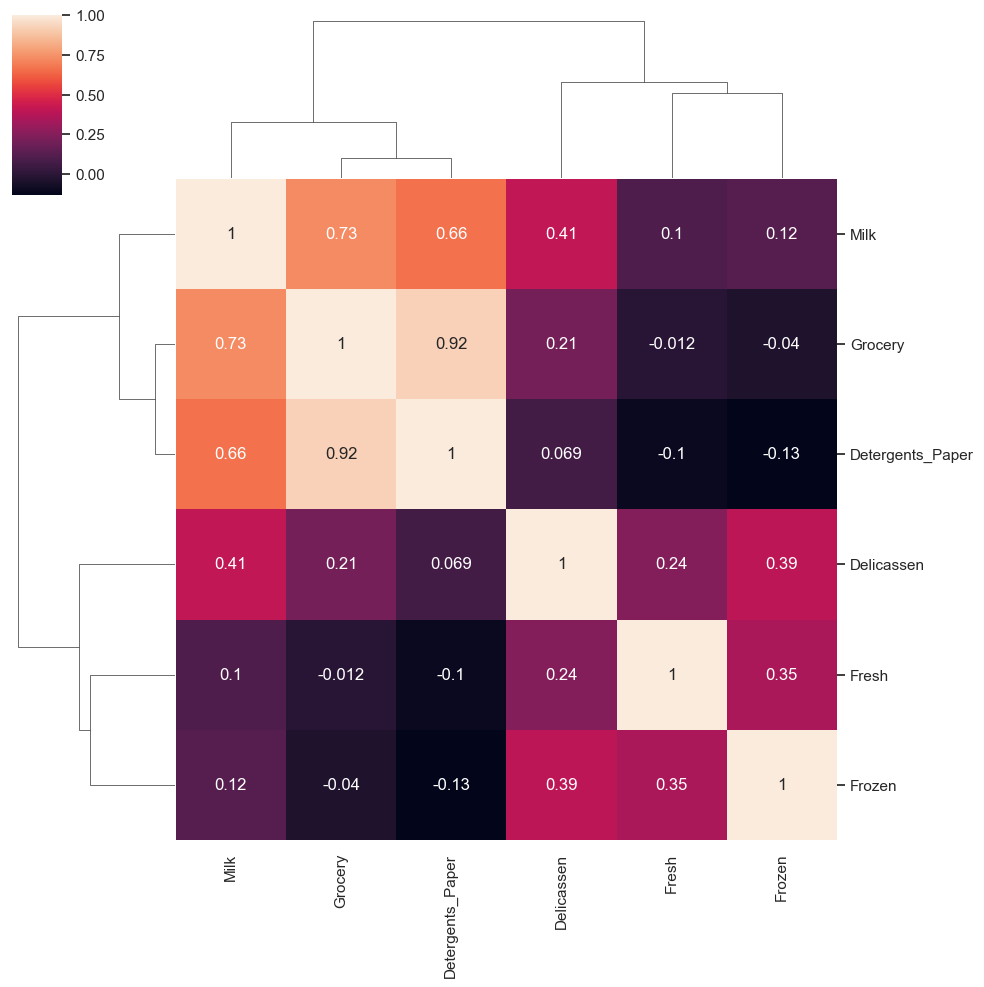

In [15]:
# Create an annotated clustermap of the correlations between spending on different cateogires.
sns.clustermap(whole.drop(['Region','Channel'],axis=1).corr(),annot=True);

C:\Users\Youssef\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


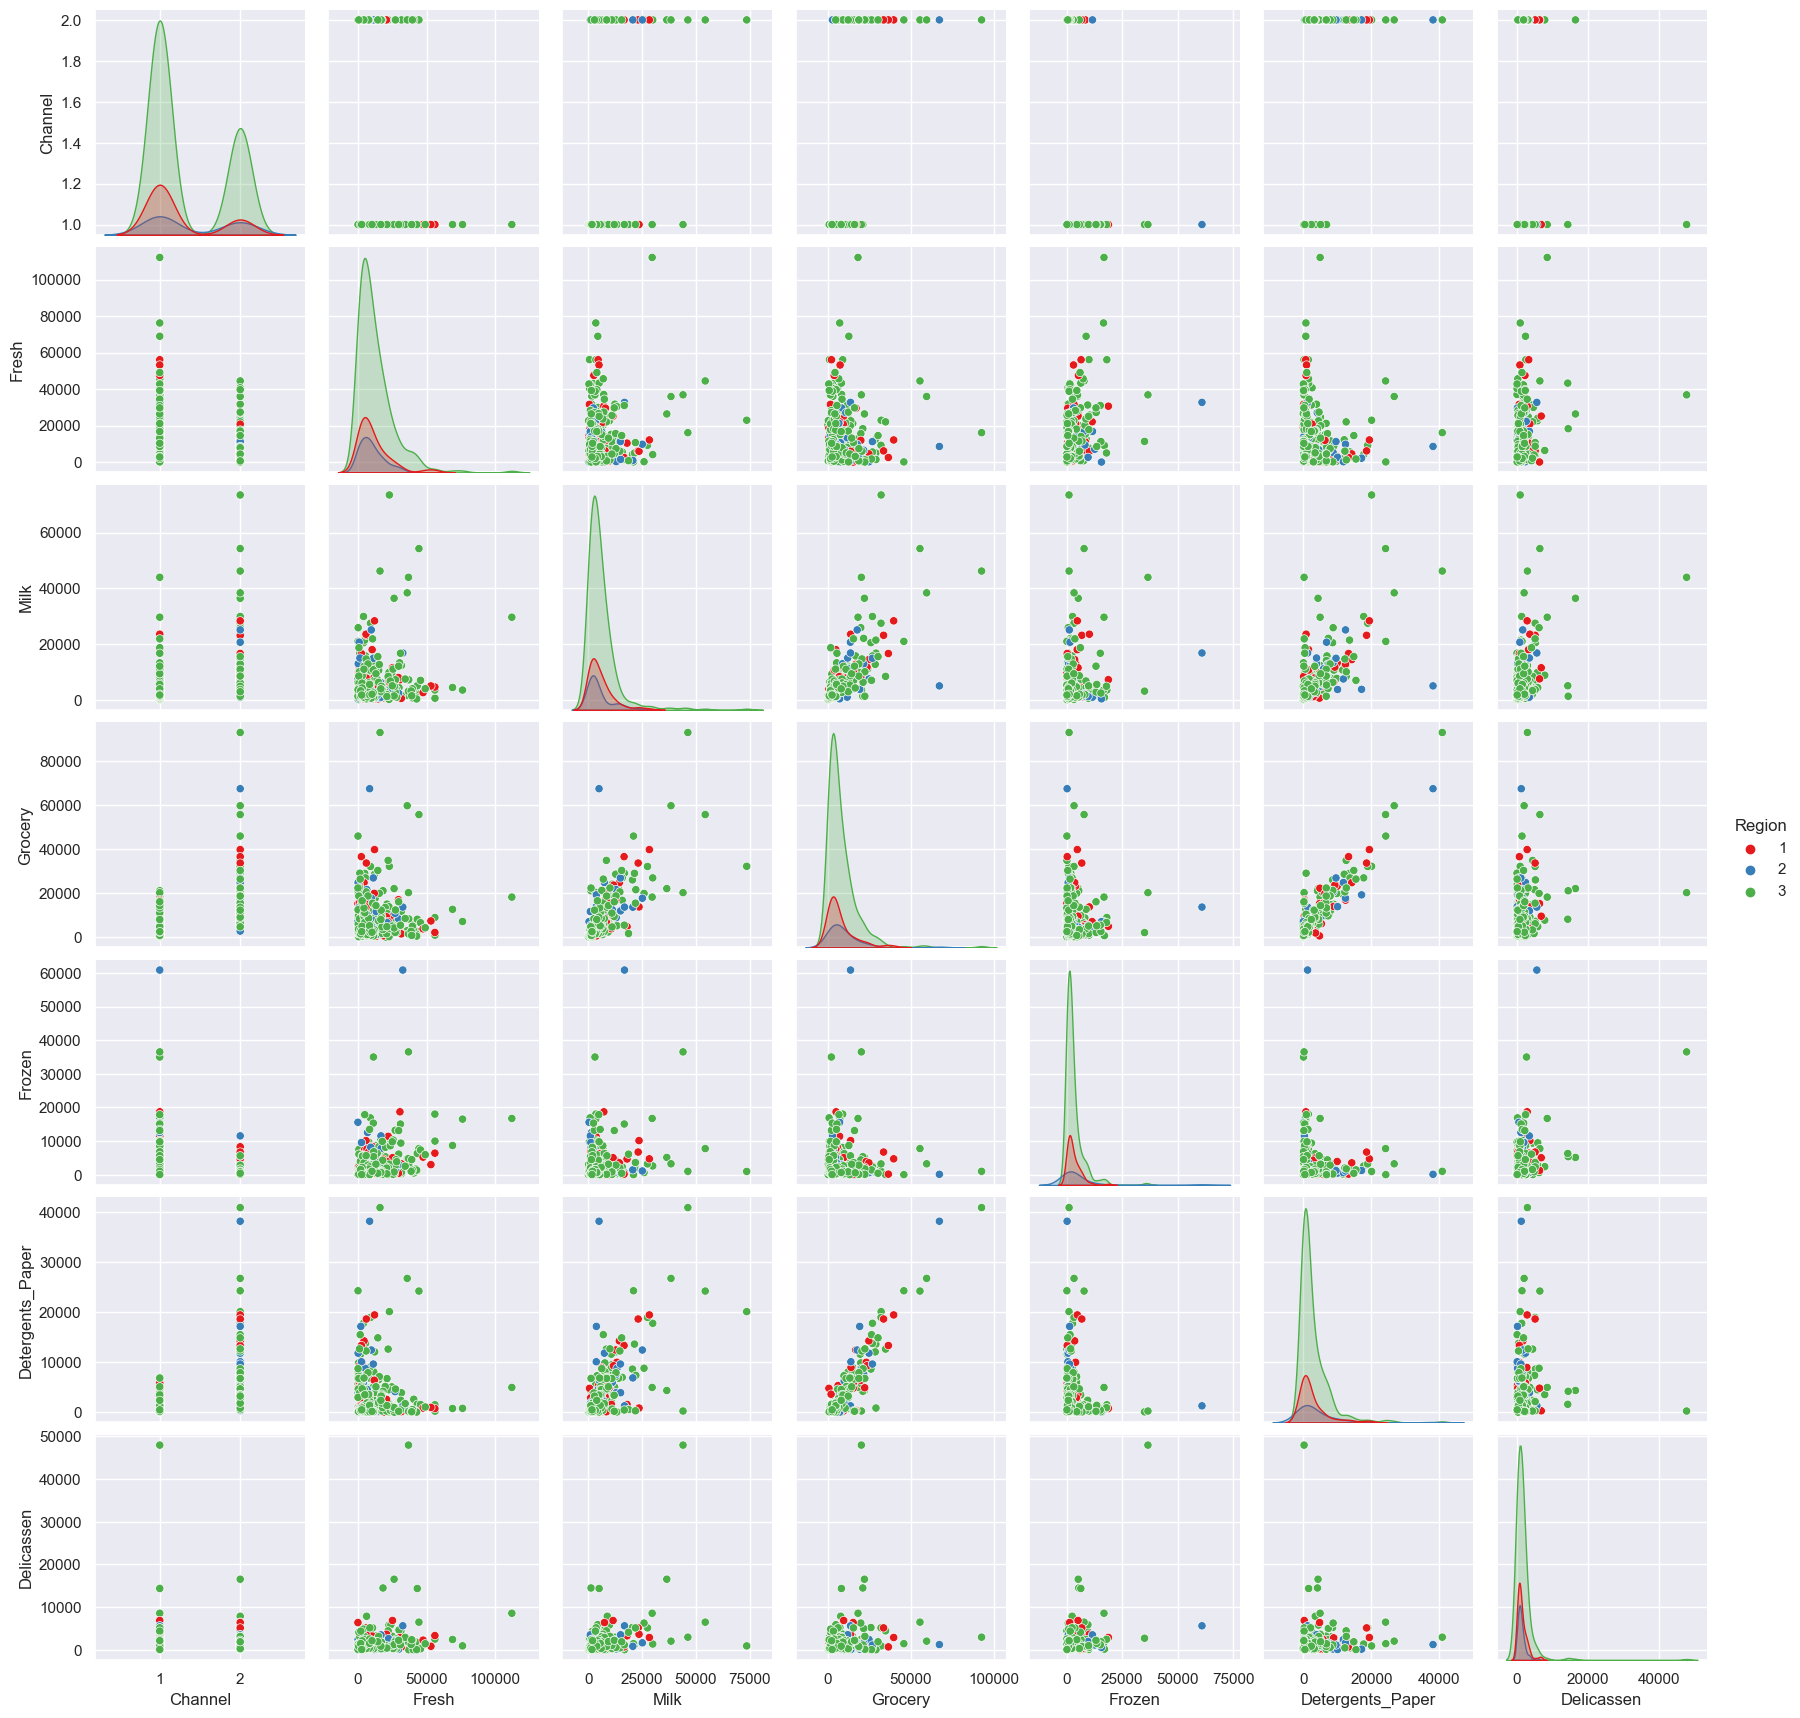

In [16]:
# Create a PairPlot of the dataframe, colored by Region.
sns.pairplot(whole,hue='Region',palette='Set1')

### Model Building & Predicting

In [17]:
# Since the values of the features are in different orders of magnitude
# let's scale the data. Use StandardScaler to scale the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(whole)

In [18]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

##### DBSCAN with Unknown Value of Epsilon

In [19]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) #outliers==-1
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

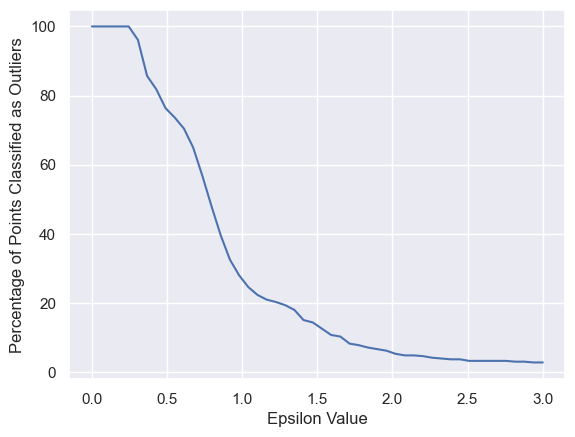

In [20]:
# Create a line plot of the percentage of outlier points versus the epsilon value choice.
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

##### DBSCAN with Chosen Value of Epsilon

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

<Axes: xlabel='Grocery', ylabel='Milk'>

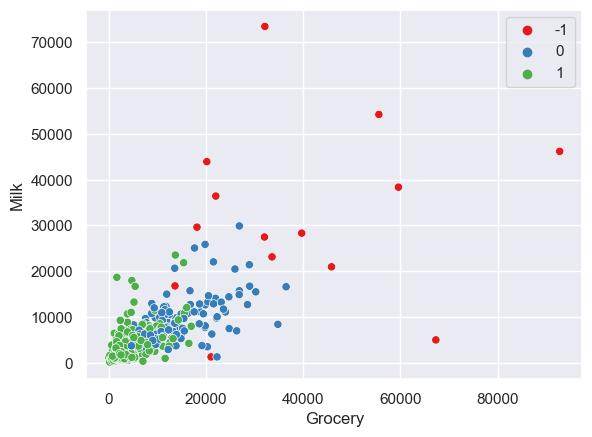

In [23]:
# Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.
sns.scatterplot(data=whole,x='Grocery',y='Milk',hue=dbscan.labels_, palette='Set1')

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

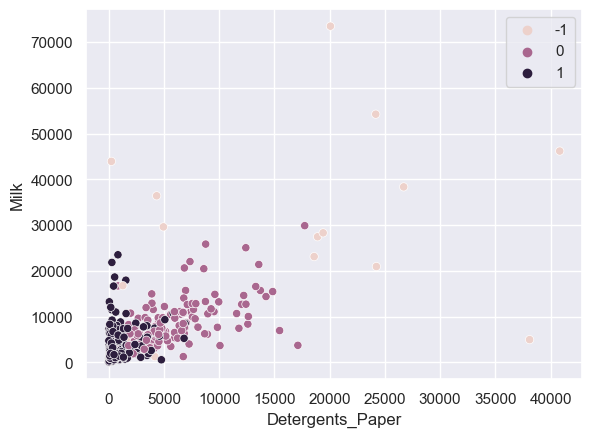

In [24]:
# Create a scatterplot of Milk vs. Detergents Paper colored by the labels.
sns.scatterplot(data=whole,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)

In [25]:
# Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.
whole['Labels'] = dbscan.labels_

In [26]:
whole.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [27]:
# Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.
categories_mean = whole.drop(['Channel','Region'],axis=1).groupby('Labels').mean()
categories_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


In [28]:
# Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(categories_mean)
scaled_means = pd.DataFrame(data,categories_mean.index,categories_mean.columns)

In [29]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<Axes: ylabel='Labels'>

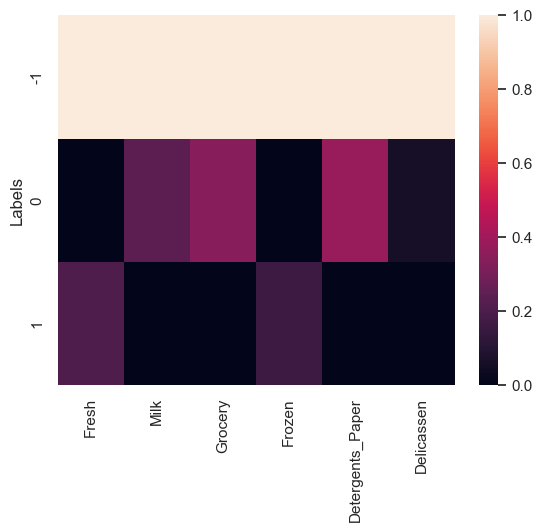

In [30]:
sns.heatmap(scaled_means)

<Axes: ylabel='Labels'>

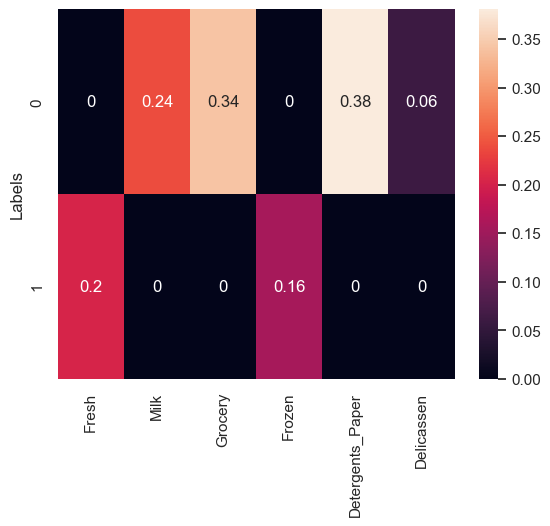

In [31]:
# Create another heatmap similar to the one above, but with the outliers removed
sns.heatmap(scaled_means.loc[[0,1]],annot=True)

==========

# THANK YOU!